In [586]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

In [587]:
df = pd.read_csv('train.csv')

In [588]:
#check the data
df.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,mon,4797,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no


In [589]:
#check if there are any NaN values
df.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [590]:
#check count of rows
df.count()

RecordID          22500
age               22500
job               22500
marital           22500
education         22500
default           22500
housing           22500
loan              22500
contact           22500
month             22500
day_of_week       22500
duration          22500
campaign          22500
pdays             22500
previous          22500
poutcome          22500
emp.var.rate      22500
cons.price.idx    22500
cons.conf.idx     22500
euribor3m         22500
nr.employed       22500
subscribe         22500
dtype: int64

In [591]:
#check data types
df.dtypes

RecordID            int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe          object
dtype: object

In [592]:
#check boolean columns

bool_cols = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]
bool_cols

[]

In [593]:
#check the unique values for housing; note there are several 'unknown'
df.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [594]:
#check the unique values for loan; note there are several 'unknown'
df.loan.unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [595]:
#check the unique values for default; note there are several 'unknown'
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [596]:
#Change 'yes', 'no' values to '1', '0'
map_yn = {'yes' : 1, 'no' : 0}
df.subscribe = df.subscribe.map(map_yn)
df.housing = df.housing.map(map_yn)
df.loan = df.loan.map(map_yn)
df.default = df.default.map(map_yn)

In [597]:
#check if there are any NaN values
df.isna().sum()

RecordID             0
age                  0
job                  0
marital              0
education            0
default           4860
housing            886
loan               889
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribe            0
dtype: int64

In [598]:
#copy to a new dataframe to make changes
df1 = df.copy()

In [599]:
#check all the columns and the first rows of the data
pd.set_option('display.max_columns', None)
df1.head()

,RecordID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,0.0,1.0,1.0,cellular,aug,mon,4457,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,0
1,23986,52,services,married,high.school,NaN,1.0,0.0,cellular,may,mon,4797,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,1
2,20663,46,blue-collar,divorced,basic.9y,0.0,0.0,0.0,cellular,apr,wed,169,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,0
3,13958,26,entrepreneur,single,high.school,1.0,1.0,1.0,cellular,aug,fri,376,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,1
4,28184,47,admin.,single,university.degree,0.0,0.0,0.0,cellular,nov,tue,3033,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,0


In [601]:
df1.columns

Index(['RecordID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

In [602]:
#check how many unique jobs
df1.job.unique()

array(['admin.', 'services', 'blue-collar', 'entrepreneur', 'management',
       'technician', 'housemaid', 'self-employed', 'unemployed',
       'retired', 'student', 'unknown'], dtype=object)

In [603]:
#checking the correlation matrix
df1.corr()
#Seems not a strong correlation between subscribe and other variables

,RecordID,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
RecordID,1.000000,0.001750,-0.018274,0.082041,0.004947,0.010348,-0.043917,-0.097207,0.071292,-0.835081,-0.391390,-0.132593,-0.541810,-0.397919,0.268302
age,0.001750,1.000000,0.214069,-0.004093,0.045274,0.005017,0.239789,-0.009640,0.005006,0.001689,-0.005674,0.054529,0.008518,0.000972,0.093892
default,-0.018274,0.214069,1.000000,-0.014403,0.107469,-0.000245,0.539026,0.011028,-0.006295,0.018136,0.006215,-0.000855,0.003291,0.015043,0.160437
housing,0.082041,-0.004093,-0.014403,1.000000,0.041510,-0.003149,-0.014260,-0.007079,0.008255,-0.055340,-0.045276,-0.021476,-0.034640,-0.022219,0.004047
loan,0.004947,0.045274,0.107469,0.041510,1.000000,0.000416,0.123182,-0.008696,-0.010697,0.003033,-0.003001,-0.005691,-0.006686,0.004179,0.023371
duration,0.010348,0.005017,-0.000245,-0.003149,0.000416,1.000000,0.000496,-0.527144,0.542028,-0.013169,-0.055921,0.113328,-0.182963,-0.327792,0.037470
campaign,-0.043917,0.239789,0.539026,-0.014260,0.123182,0.000496,1.000000,0.011605,-0.009045,0.065415,0.028924,0.011142,0.034502,0.038622,0.165172
pdays,-0.097207,-0.009640,0.011028,-0.007079,-0.008696,-0.527144,0.011605,1.000000,-0.559691,0.094031,0.071983,-0.124029,0.275094,0.410752,-0.100082
previous,0.071292,0.005006,-0.006295,0.008255,-0.010697,0.542028,-0.009045,-0.559691,1.000000,-0.072764,-0.080095,0.092646,-0.255666,-0.385008,0.032854
emp.var.rate,-0.835081,0.001689,0.018136,-0.055340,0.003033,-0.013169,0.065415,0.094031,-0.072764,1.000000,0.414045,0.103430,0.625127,0.476833,-0.270444


In [604]:
df1.describe()

,RecordID,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
count,22500.000000,22500.000000,17640.000000,21614.000000,21611.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,15011.876889,40.904489,0.021485,0.535209,0.169219,1146.554311,3.857244,774.562533,1.316444,0.078529,93.538746,-39.872633,3.307811,5138.567351,0.131200
std,8679.392766,12.026945,0.144999,0.498770,0.374954,1430.790448,7.210891,326.020060,1.918733,1.573831,0.647698,5.692010,1.608627,81.748896,0.337626
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,7483.750000,32.000000,0.000000,0.000000,0.000000,144.000000,1.000000,558.750000,0.000000,-1.800000,92.969840,-43.643788,1.410000,5081.293851,0.000000
50%,15032.500000,38.000000,0.000000,1.000000,0.000000,354.000000,2.000000,999.000000,0.000000,1.100000,93.485726,-41.522404,3.964364,5165.319989,0.000000
75%,22514.500000,48.000000,0.000000,1.000000,0.000000,1877.000000,3.000000,999.000000,2.000000,1.400000,93.994000,-36.100000,4.864000,5218.069326,0.000000
max,30000.000000,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [605]:
#check for duplicate values in Record ID
boolean = not df1['RecordID'].is_unique      # True (credit to @Carsten)
boolean = df1['RecordID'].duplicated().any() 

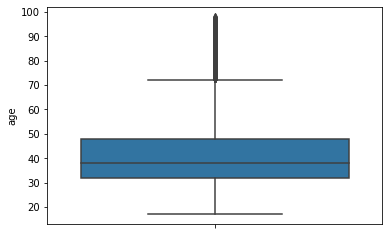

In [606]:
#boxplot for outlier detection for age
sns.boxplot(y=df1.age, data=df1)
plt.show()

In [607]:
#remove age outliers
#mean = df1['age'].mean()
#std = df1['age'].std()
#cut_off = 3* std
#upper, lower = mean+ cut_off, mean- cut_off
#df1 = df1[(df1['age'] > lower) & (df1['age'] < upper)]

In [608]:
#Use 95% quantile to remove outliers
q_cutoff = df1['age'].quantile(0.95)
mask = df1['age'] < q_cutoff
df1 = df1[mask]

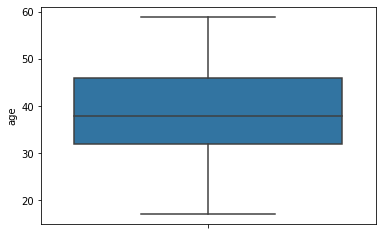

In [609]:
sns.boxplot(y=df1.age, data=df1)
plt.show()

In [610]:
df1.count()

RecordID          21316
age               21316
job               21316
marital           21316
education         21316
default           16712
housing           20643
loan              20617
contact           21316
month             21316
day_of_week       21316
duration          21316
campaign          21316
pdays             21316
previous          21316
poutcome          21316
emp.var.rate      21316
cons.price.idx    21316
cons.conf.idx     21316
euribor3m         21316
nr.employed       21316
subscribe         21316
dtype: int64

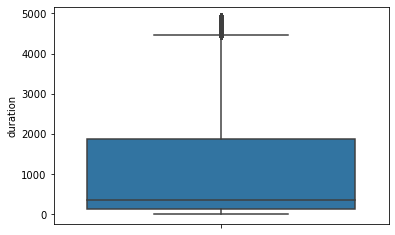

In [611]:
#boxplot for outlier detection for duration
sns.boxplot(y=df1.duration, data=df1)
plt.show()

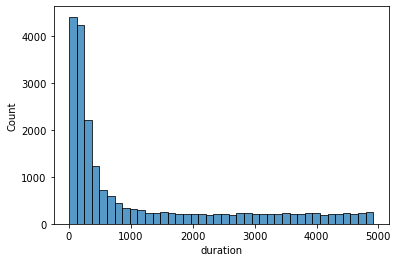

In [612]:
sns.histplot(x=df1.duration, data= df1)
plt.show()
#long tail, will not be able to remove outliers

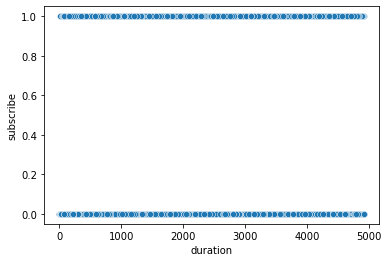

In [613]:
#before reoving tail end, check to see if the tail end values have both 1/0 values for subscribers
sns.scatterplot(x= df1.duration, y= df1.subscribe, data=df1)
plt.show()
#Both high and low values of duration has subscribers

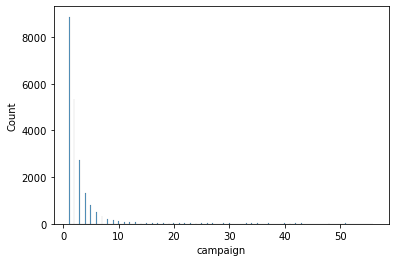

In [614]:
#check the histogram for campaign
sns.histplot(x=df1.campaign, data=df1)
plt.show()

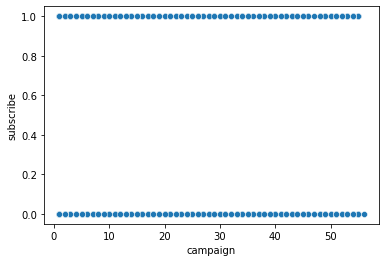

In [615]:
sns.scatterplot(x= df1.campaign, y= df1.subscribe, data=df1)
plt.show()

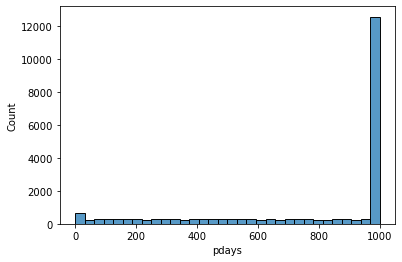

In [616]:
#check histogram for pdays
sns.histplot(x=df1.pdays, data=df1)
plt.show()

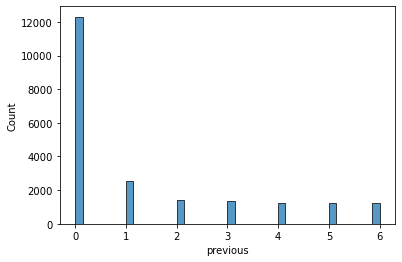

In [617]:
#check histogram for previous
sns.histplot(x=df1.previous, data= df1)
plt.show()

In [618]:
df1.columns

Index(['RecordID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

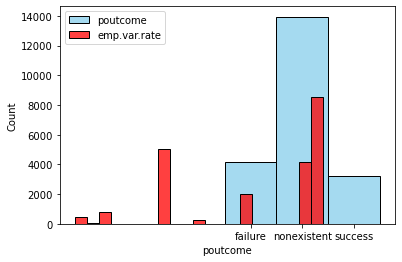

In [619]:
#check histogram for poutcome and emp.var.rate
sns.histplot(data=df1, x="poutcome", color="skyblue", label="poutcome")
sns.histplot(data=df1, x="emp.var.rate", color="red", label="emp.var.rate")
plt.legend()
plt.show()

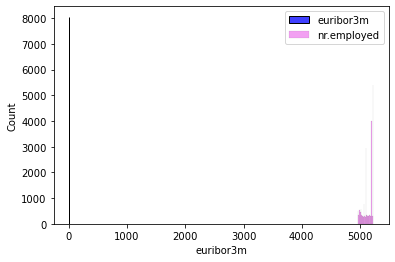

In [620]:
#check histogram for euribor3m and nr.employed
sns.histplot(data=df1, x="euribor3m", color="blue", label="euribor3m")
sns.histplot(data=df1, x="nr.employed", color="violet", label="nr.employed")
plt.legend()
plt.show()

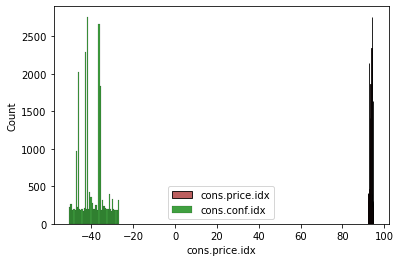

In [621]:
#check histogram for cons.price.inde and cons.conf.index
sns.histplot(data=df1, x="cons.price.idx", color="brown", label="cons.price.idx")
sns.histplot(data=df1, x="cons.conf.idx", color="green", label="cons.conf.idx")
plt.legend()
plt.show()

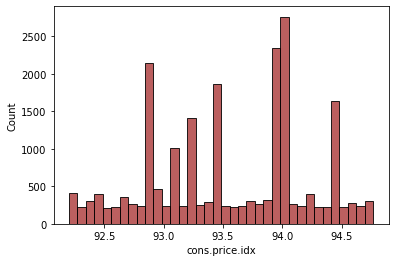

In [622]:
sns.histplot(data=df1, x="cons.price.idx", color="brown", label="cons.price.idx")
plt.show()

In [623]:
#remove consumer price outliers using quantiles
q_cutoffh = df1['cons.price.idx'].quantile(0.95)
q_cutoffl = df1['cons.price.idx'].quantile(0.05)
maskh = df1['cons.price.idx'] < q_cutoffh
df1 = df1[maskh]
maskl = df1['cons.price.idx'] > q_cutoffl
df1 = df1[maskl]

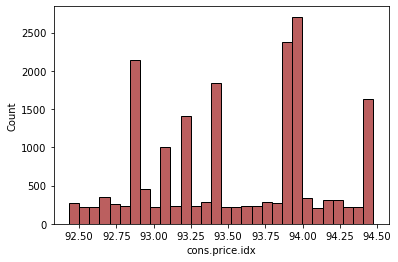

In [624]:
sns.histplot(data=df1, x="cons.price.idx", color="brown", label="cons.price.idx")
plt.show()

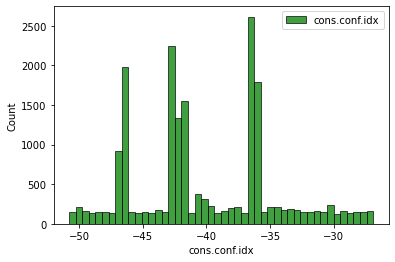

In [625]:
#check histogram for consumer confidence index
sns.histplot(data=df1, x="cons.conf.idx", color="green", label="cons.conf.idx")
plt.legend()
plt.show()

In [626]:
#remove consumer confidence index outliers
q_cutoffh = df1['cons.conf.idx'].quantile(0.95)
q_cutoffl = df1['cons.conf.idx'].quantile(0.05)
maskh = df1['cons.conf.idx'] < q_cutoffh
df1 = df1[maskh]
maskl = df1['cons.conf.idx'] > q_cutoffl
df1 = df1[maskl]

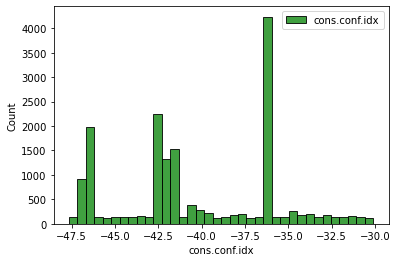

In [627]:
sns.histplot(data=df1, x="cons.conf.idx", color="green", label="cons.conf.idx")
plt.legend()
plt.show()

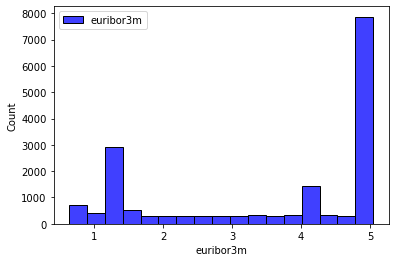

In [628]:
sns.histplot(data=df1, x="euribor3m", color="blue", label="euribor3m")
plt.legend()
plt.show()

In [629]:
df1.isna().sum()

RecordID             0
age                  0
job                  0
marital              0
education            0
default           3858
housing            554
loan               565
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribe            0
dtype: int64

In [630]:
#dropping all the NaN values
df1.dropna(inplace= True)

In [631]:
df1.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [633]:
df1.count()

RecordID          12858
age               12858
job               12858
marital           12858
education         12858
default           12858
housing           12858
loan              12858
contact           12858
month             12858
day_of_week       12858
duration          12858
campaign          12858
pdays             12858
previous          12858
poutcome          12858
emp.var.rate      12858
cons.price.idx    12858
cons.conf.idx     12858
euribor3m         12858
nr.employed       12858
subscribe         12858
dtype: int64